In [1]:
import logging
from ban.base.logging.log import SeoungSimLogger
from ban.config.JSONConfig import JSONConfig
import simpy
from simpy.events import NORMAL

from ban.base.helper.mobility_helper import MobilityHelper, MovementPhase
from ban.base.mobility import MobilityModel, BodyPosition

import matplotlib.pyplot as plt

env = simpy.Environment()

# 앞에 애들은 움직이지 않는 애들임
positions = tuple(BodyPosition)[7:]
mob_helper = MobilityHelper(env)

INITIAL_DELAY = int(JSONConfig.get_config("initial_delay"))

time = env.now

mobs = []
for pos in positions:
    mob = MobilityModel(pos)
    mobs.append(mob)
    mob_helper.add_mobility_list(mob)

mobs_pos = [[] for _ in range(len(positions))]

logger = SeoungSimLogger("PRINT", logging.CRITICAL)

def print_info(ev):
    for idx, mob in enumerate(mob_helper.mobility_list):
        pos = mob.get_position()
        mobs_pos[idx].append((pos.x, pos.y, pos.z))

    event = simpy.Event(env)
    event.env = env
    event._ok = True
    event.callbacks.append(print_info)
    
    logger.log(env.now, "logging")
    env.schedule(event, priority=NORMAL, delay=0.13)

event = simpy.Event(env)
event.env = env
event._ok = True
event.callbacks.append(mob_helper.do_walking)
env.schedule(event, priority=NORMAL, delay=0)

event = simpy.Event(env)
event.env = env
event._ok = True
event.callbacks.append(print_info)
env.schedule(event, priority=NORMAL, delay=0.5) # 999.4

def init_time(ev):
    global time

    time = env.now

event = simpy.Event(env)
event.env = env
event._ok = True
event.callbacks.append(init_time)
env.schedule(event, priority=NORMAL, delay=0)
env.run(until=1.5)

100%|██████████| 9/9 [00:00<00:00, 1325.54it/s]

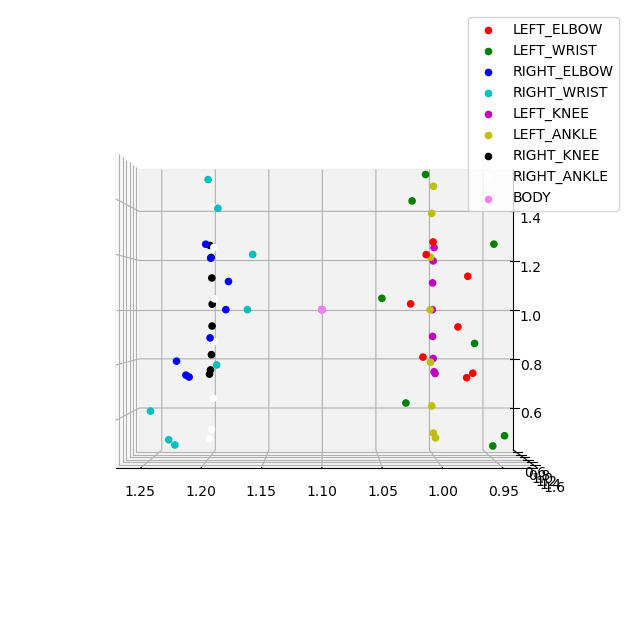

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from tqdm import tqdm

# 임의의 mobs_pos 리스트 생성
# mobs_pos = [...]

colors = ('r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'violet', 'purple', 'lavender', 'darkorange', 'crimson', 'darkcyan', 'crimson')
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.view_init(elev=0, azim=90)

for i, mob in enumerate(tqdm(mobs_pos)):
    xs, ys, zs = zip(*mob)  # 각 점의 x, y, z 좌표 분리
    ax.scatter(xs, ys, zs, color=colors[i % len(colors)], alpha=1, label=str(positions[i]).split('.')[1])  # 점들 그리기
    # ax.text(xs[0], ys[0], zs[0], str(positions[i]).split('.')[1], color="black")


ax.legend()
plt.show()

In [ ]:
mobs_pos

In [ ]:
positions

In [19]:
positions
static_positions = {str(positions[i]): mobs_pos[i] for i in range(len(positions))}

In [20]:
static_positions

{'BodyPosition.LEFT_ELBOW': [(1.0061661697775701,
   1.5782110643130856,
   1.2490486745229363),
  (1.0110669593086896, 1.4566058909122386, 1.204788011072248),
  (0.9747549614747337, 1.3834936490538905, 1.125),
  (1.0236646743491826, 1.3509513254770638, 1.0217889356869145),
  (0.9829390471647402, 1.3585185434277331, 0.9352952387243697),
  (1.0135437153730635, 1.4232233047033631, 0.8232233047033631),
  (0.9718991085387422, 1.514494964168583, 0.7650768448035229),
  (0.9783087087490071, 1.6217889356869146, 0.7509513254770637)],
 'BodyPosition.LEFT_WRIST': [(1.0123323395551402,
   1.556422128626171,
   1.4980973490458727),
  (1.0221339186173792, 1.313211781824477, 1.409576022144496),
  (0.9495099229494675, 1.166987298107781, 1.25),
  (1.0473293486983652, 1.1019026509541274, 1.043577871373829),
  (0.9658780943294805, 1.1170370868554662, 0.8705904774487394),
  (1.027087430746127, 1.2464466094067261, 0.6464466094067263),
  (0.9437982170774843, 1.4289899283371659, 0.5301536896070458),
  (0.956

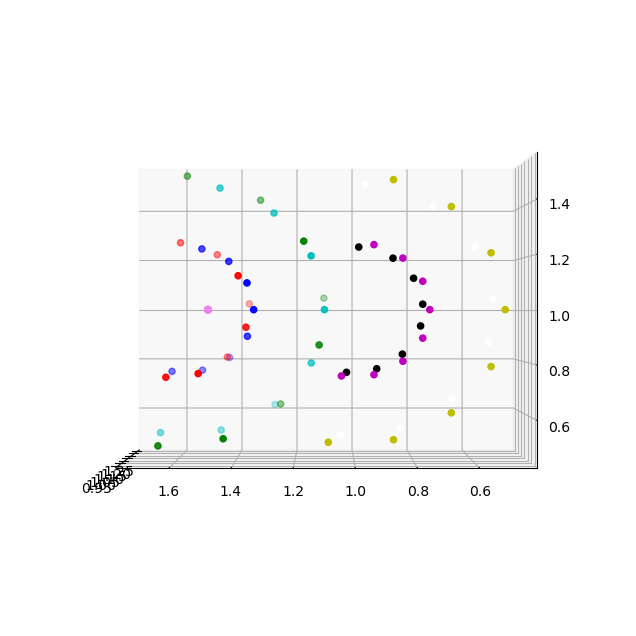

In [22]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.view_init(elev=0, azim=180)

i = 0
# 모든 관절의 좌표를 시각화
for position, coordinates in static_positions.items():
    x, y, z = zip(*coordinates)
    ax.scatter(x, y, z, color=colors[i], marker='o', label=position)
    i += 1

# 그래프 스타일과 범례 추가
plt.grid(True)
plt.show()

In [23]:
import json

with open("./position.json", 'w', encoding="utf8") as f:
    json.dump(static_positions, f)